# Logic definitions

In [1]:
type ∨[P, Q] = Either[P, Q]
type ∧[P, Q] = Tuple2[P, Q]
type ⟶[P, Q] = P => Q
type ⊥ = Nothing
type True = Unit
type ¬[P] = P => ⊥ 

defined type ∨
defined type ∧
defined type ⟶
defined type ⊥
defined type True
defined type ¬

In [2]:
type Or[P, Q] = Either[P, Q]
type And[P, Q] = Tuple2[P, Q]
type Implies[P, Q] = P => Q
type False = Nothing
type True = Unit
type Not[P] = P => ⊥ 

defined type Or
defined type And
defined type Implies
defined type False
defined type True
defined type Not

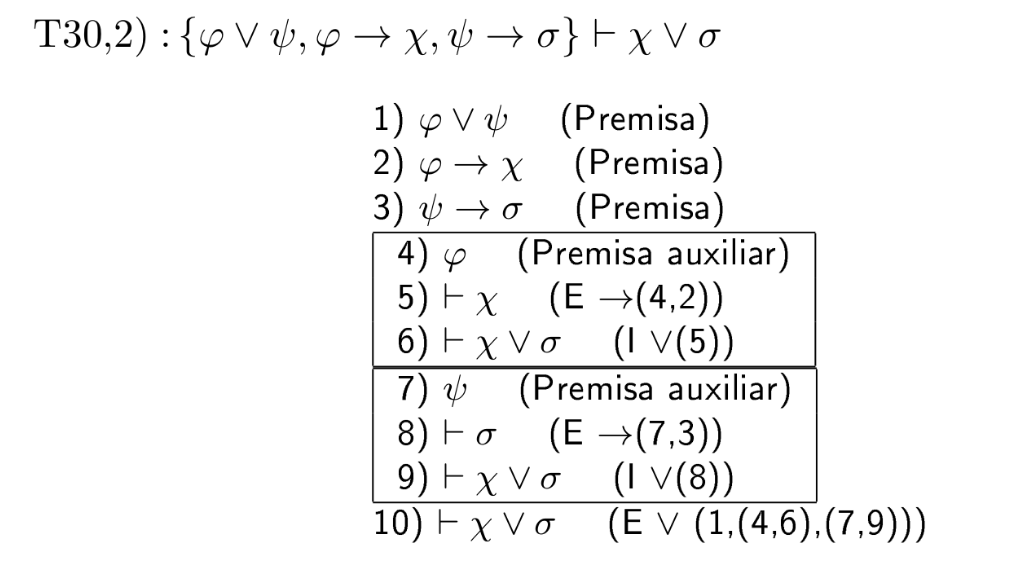

In [3]:
def t30[P, Q, R, S](p1: Either[P, Q], p2: P => R, p3: Q => S): Either[R, S] = 
    p1 match {
        case Left(p: P) => 
            Left(p2(p))
        case Right(q: Q) => 
            Right(p3(q))
    }

defined function t30

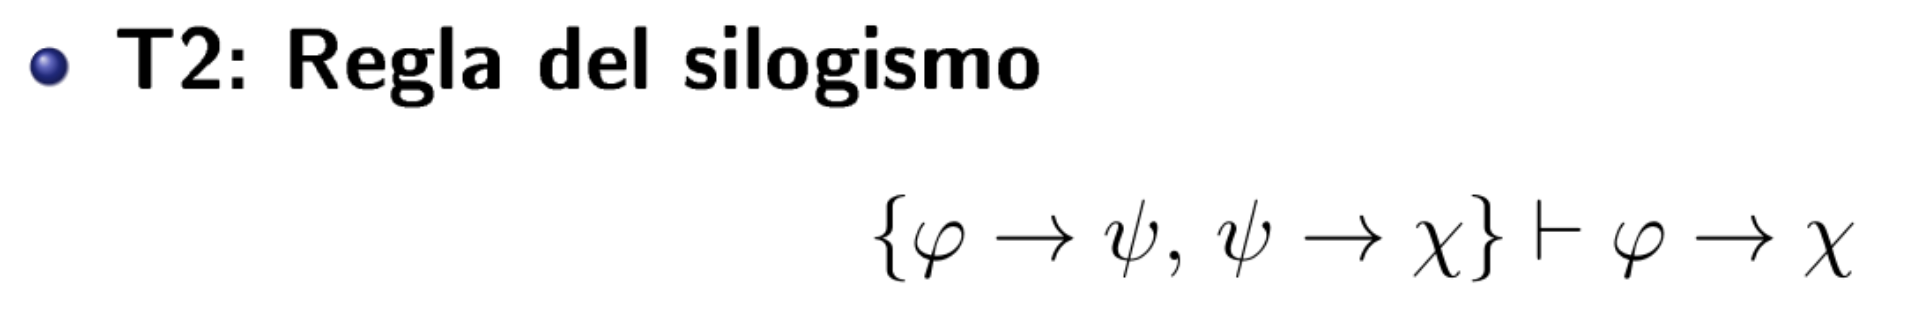

In [4]:
def t2[P, Q, R](p1: P => Q, p2: Q => R): P => R = 
    (p: P) => p2(p1(p) : Q) : R

defined function t2

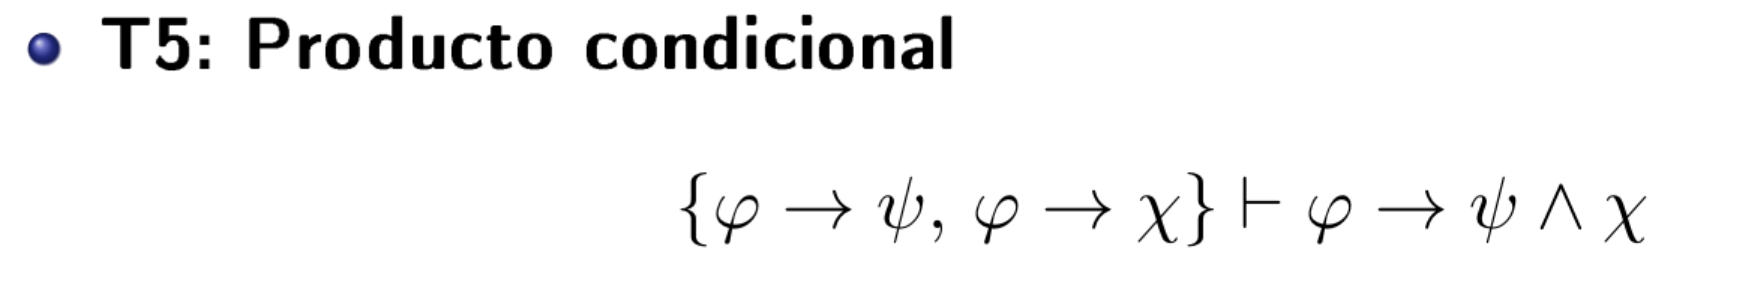

In [5]:
def t5[P, Q, R](p1: P => Q, p2: P => R): P => (Q, R) = 
    (p: P) => (p1(p), p2(p))

defined function t5

# Classical vs. Intuitionistic logic

# $\vdash \neg (p \wedge q) \rightarrow \neg p \vee \neg q$

In [6]:
def program[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    { `1`: (((P, Q)) => Nothing) => 
        // Left((p: P) => `1`((p : P, ??? : Q)) : Nothing)
        Right((q: Q) => `1`((??? : P, q : Q)) : Nothing)
    }

defined function program

We can't implement that signature, i.e. we can't prove that theorem. What did it fail? Did the correspondence fail? Not at all, because that proposition is *not* a theorem of intuitionistic propositional logic, which is the kind of logic that corresponds to the typed-lambda calculus. That proposition is indeed a theorem, but of classical logic, and we can prove it in an intuitionistic setting if we add the law of excluded middle as a premise: 

In [7]:
def program[P, Q](thirdMiddleP: Either[P, Not[P]]): Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    { `1`: (((P, Q)) => Nothing) => 
        thirdMiddleP match {
            case Left(p: P) => 
                Right((q: Q) => `1`((p : P, q : Q)) : Nothing)
            case Right(np: Not[P]) => 
                Left((p: P) => np(p) : Nothing)
        }
    }


defined function program